In [2]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:

#standardization function - calculate z scores
def std_func(i):
     return (i-i.mean())/(i.std())
    

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = std_func(Univ.iloc[:,1:])
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.401994,0.644235,-0.871888,0.068841,-0.324717,0.803729
1,1.370988,1.210256,-0.719814,-1.652182,2.508651,-0.631501
2,-0.059432,-0.745090,1.003685,-0.914600,-0.163745,-1.625123
3,0.401994,-0.024699,-0.770506,-0.177019,0.285756,0.141315
4,0.125139,0.335496,-0.314285,0.068841,-0.382949,0.362120


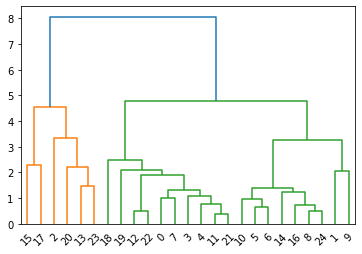

In [6]:
# create dendrogram

dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [7]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [8]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc


array([2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1], dtype=int64)

In [9]:
#df_norm['h_clusterid'] = pd.Series(y_hc)
Univ['h_clusterid'] = pd.Series(y_hc)

In [10]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,1


In [11]:
result=Univ.iloc[:,1:].groupby(Univ.h_clusterid).mean()
result

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
h_clusterid,,,,,,,
0,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000,0
1,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222,1
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000,2


In [15]:
help('linkage')

No Python documentation found for 'linkage'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.

